In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
# !pip install xgboost
# !pip install catboost

In [7]:
df = pd.read_csv("data/stud.csv")

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df["total_score"] = df["math_score"]+df["reading_score"]+df["writing_score"]
df["average"] = df["total_score"]/3

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [11]:
X = df.drop(columns=["math_score"])

In [12]:
y = df["math_score"]

In [13]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [19]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [20]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include=["object"]).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder",cat_transformer,cat_features),
        ("StdScaler",num_transformer,num_features)
    ]
)

In [21]:
X_preprocessed = preprocessor.fit_transform(X)

In [23]:
X.shape

(1000, 9)

In [24]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [25]:
x_train.shape,x_test.shape

((800, 21), (200, 21))

In [33]:
from typing import List

def evaluateModel(true:List[float],predicted:List[float])->List[float]:
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mse)
    r2_sq = r2_score(true,predicted)
    return mae,rmse,r2_sq

In [34]:
models = {
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Nearest-Neighbour":KNeighborsRegressor(),
    "Desicion Tree":DecisionTreeRegressor(),
    "CatBoost":CatBoostRegressor(),
    "Adaboost":AdaBoostRegressor(),
    "XGBoost":XGBRegressor(),
    "Random Forest":RandomForestRegressor()
}

In [44]:
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) 

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    model_train_mae , model_train_rmse, model_train_r2 = evaluateModel(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluateModel(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.7381
- Mean Absolute Error: 3.7439
- R2 Score: 0.9004
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7171
- Mean Absolute Error: 3.7579
- R2 Score: 0.9086


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3396
- Mean Absolute Error: 0.2724
- R2 Score: 0.9995
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3432
- Mean Absolute Error: 0.2684
- R2 Score: 0.9995


K-Nearest-Neighbour
Model performance for Training set
- Root Mean Squared Error: 4.2791
- Mean Absolute Error: 3.3838
- R2 Score: 0.9188
-------------------------

In [45]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999516
7,XGBoost,0.977101
5,CatBoost,0.968100
8,Random Forest,0.963826
4,Desicion Tree,0.936693
6,Adaboost,0.923163
1,Lasso,0.908560
3,K-Nearest-Neighbour,0.889781


In [46]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


Text(0, 0.5, 'Predicted')

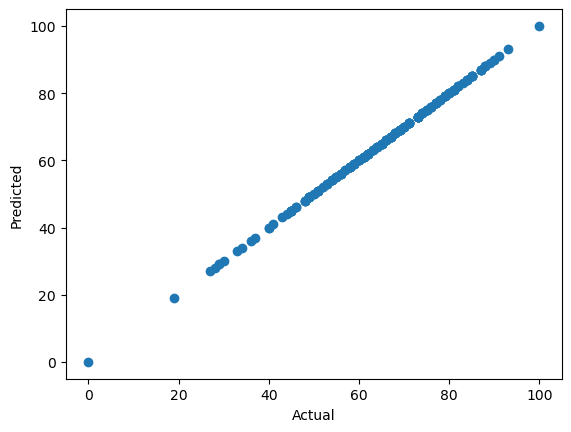

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

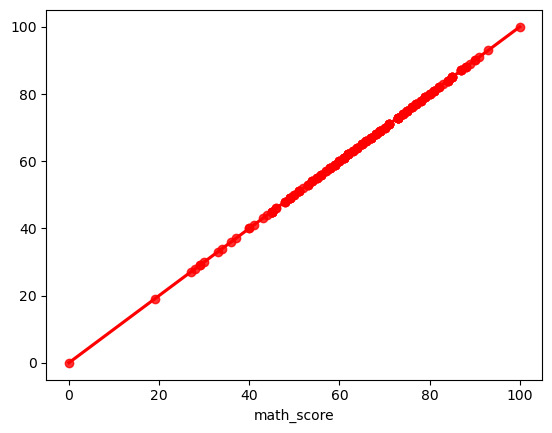

In [48]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [49]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-2.131628e-13
737,53,53.0,2.131628e-14
740,80,80.0,-2.842171e-14
660,74,74.0,-7.105427e-14
411,84,84.0,-1.421085e-13
...,...,...,...
408,52,52.0,1.421085e-13
332,62,62.0,1.207923e-13
208,74,74.0,-8.526513e-14
613,65,65.0,-7.105427e-14
